# Grade: /20 pts

# Assignment 06: Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question1: Preprocessing (1pt)
**Make sure to only use the imports included in the first cell. Any additional imports used will result in 0.** <br>
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0 <br>

In [3]:
model_data = pd.read_csv("footballer_small.csv")
model_data = model_data.drop(columns=["ID", "club", "club_logo", "birth_date", "flag", "nationality", "photo", "potential"])
model_data = pd.get_dummies(model_data, drop_first=False, columns=["work_rate_att", "work_rate_def", "preferred_foot"])

x_data = model_data.drop(columns=["overall"])
y_data = model_data.overall

x_data.head(5)
print(x_data.columns.get_loc("stamina"))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 500, random_state = 0)


29


## Question 2: Building the pipeline that preprocesses the data (2pts)
In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. Build the pipeline that preprocesses the feature columns of the training data and create a linear regression model. Plot the data before and after the standardization for the stamina feature. <br>
In this question, there is no need to overwrite the training set's values. Create a new variable to include the standardized data. The original training data is needed for future exercises. <br>

### Question
Make observations about the plot.  

The standardize function centers the data around x = 0. 
This is because the Standard Scaler function coverts the data to z-scores.
Z-scores are a measure if how of many standard deviations the data point is from the mean.
The majority (68%) of the data will lie within 1 standard deviation or a z score between (+1, -1).
Standardizing the data allows for easy comparision between different features

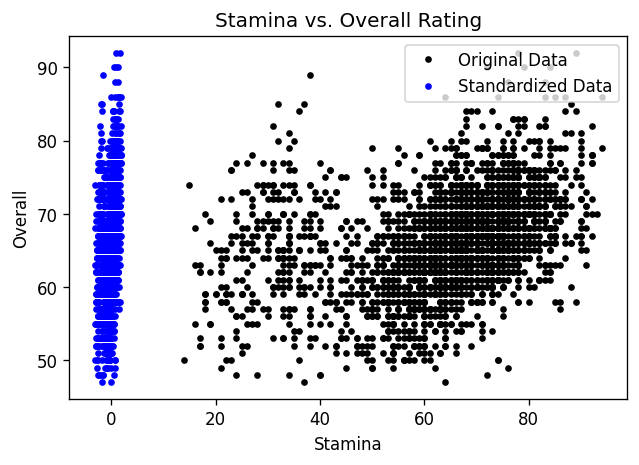

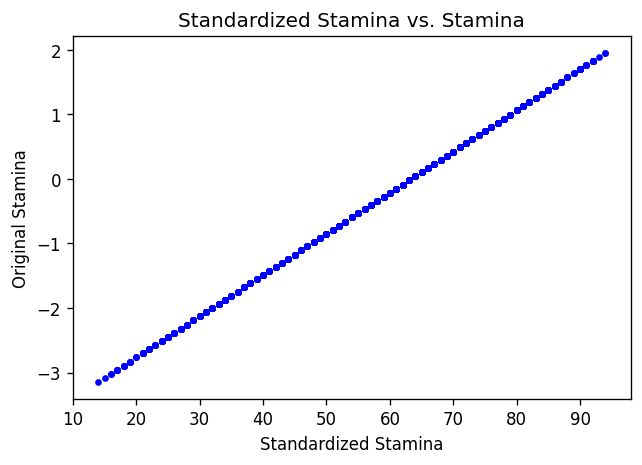

In [4]:
# Standardize Data
scaler = StandardScaler()
x_train_stand = scaler.fit_transform(x_train) 

# Pipe Lines 
linear_pipeline = Pipeline([('linear_regression', sk.linear_model.LinearRegression())])
linear_pipeline.fit(x_train, y_train)
yp_stand = linear_pipeline.predict(x_test)

# Plot
fig, ax = plt.subplots(dpi = 120)
fig.set_facecolor('white')

# Plot Formatting 
ax.set_title('Stamina vs. Overall Rating')
ax.set_xlabel('Stamina')
ax.set_ylabel('Overall')

# Plot Data
p1 = ax.plot(x_train.stamina,y_train, 'k.', label='Original Data')
p2 = ax.plot(x_train_stand[:, 29],y_train, 'b.', label='Standardized Data')

ax.legend(loc=1)
plt.show()

# Plot 2
fig2, ax2 = plt.subplots(dpi = 120)
fig2.set_facecolor('white')

# Plot Formatting 
ax2.set_title('Standardized Stamina vs. Stamina')
ax2.set_xlabel('Original Stamina')
ax2.set_ylabel('Standardized Stamina')

ax2.plot(x_train.stamina, x_train_stand[:, 29], 'b.', label='Standardized Data')

## Question 3: Creating a Complex feature model using 2-nd Polynomial features (2pts)
In this task, the training data consists of the quadratic terms and 2-way interactions of all features except one of standing_tackle, composure, and marking variable. <br> 
Create <b> four </b> different training sets:
* The first training set includes the quadratic terms and 2-way interactions of all the features. 
* The second/third/fourth training sets include all the features, their quadratic terms, and their 2-way interactions except the standing_tackle/composure/marking features. <br>

#### Hint: 
For the 2nd/3rd and 4th training sets, create the training sets without the aforementioned features and then apply polynomial expansion to the resultant sets. 
### Questions:
* How many linear terms are in each of the new feature set?
* How many squared terms are in each of the new feature set?
* How many interaction terms are in each of the new feature set? Give an example of one of the interaction terms. 

### Answers:
1) The number of linear terms are equal to the input size of the features.
For the first training set there are 48 linear terms.
For the rest of the training sets (2, 3, 4) there are 47 linear terms.

2) The number of squared terms are equal to the input size of the feature array.
For the first training set there are 48 squared terms.
For the rest of the training sets (2, 3, 4) there are 47 squared terms.

3) The number of interaction terms is equal to number of features choose 2.
For the first training there are 1128 interaction terms.
For the rest of the training sets (2, 3, 4) there are 1081 squared terms. 

In [5]:
drop_features = ["", "standing_tackle", "composure", "marking"]
x_train_sets = [x_train]*4
poly_train_set = [None]*4

# Create training set and respective models 
for i, d in enumerate(drop_features):
    if d != "":
        x_train_sets[i] = x_train.drop(columns=[d])
    poly = sk.preprocessing.PolynomialFeatures(2, include_bias=False)
    poly_train_set[i] = poly.fit_transform(x_train_sets[i])

## Question 4: Evaluating the backward feature search (3 pts)
In this question, you have to use the pipeline created in question 2 and apply it to each of the training sets created in question 3. Use 10-fold cross validation to report the validation error on the training set using mean squared error as the metric. <br>
Show all the steps of the process and compare and analyze the results using the validation error reported. 

### Analyze Results
The validation error decreases in training set that exclude standing_tackle, composure, and marking variables.
This is because the model starts likely overfits the data since there


In [6]:
sc = sk.metrics.make_scorer(mean_squared_error)
for i, x_train_set in enumerate(x_train_sets):
    
    linear_mean_cv_scores = cross_val_score(linear_pipeline, poly_train_set[i], y_train, cv=10, scoring=sc)
 
    print()
    print(f"Training Set {i+1}")
    print(f"Linear Regression CV Mean: {linear_mean_cv_scores.mean()}")
    print(f"Linear Regression CV: {linear_mean_cv_scores}")
    print("================================================")


Training Set 1
Linear Regression CV Mean: 2.974991513282734
Linear Regression CV: [3.48897473 3.10443289 2.77710722 3.34002948 3.2454721  3.12671938
 2.35248528 3.71585915 2.20661187 2.39222303]

Training Set 2
Linear Regression CV Mean: 2.753824879135491
Linear Regression CV: [2.98133477 3.24467527 2.60675889 3.02436998 2.86415165 2.83333791
 2.28982627 3.38287098 2.12087719 2.19004588]

Training Set 3
Linear Regression CV Mean: 2.805999044782616
Linear Regression CV: [3.67971646 2.76504401 2.79217667 3.04005257 2.87915298 3.19925863
 2.12884124 2.86201802 2.31223003 2.40149983]

Training Set 4
Linear Regression CV Mean: 2.696850906112609
Linear Regression CV: [2.50415977 3.0826806  2.68855436 3.05223502 2.84891335 3.00565912
 2.16692768 3.32956398 2.10286076 2.18695442]


## Question 5: Applying Ridge Regression (2 pts)
Build a pipeline that performs scaling and fits the ridge regression on the data that includes the polynomial expansion of all the features. The penalization parameter is set to 0.5. Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [7]:
ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge_regression', Ridge(alpha=5.0, fit_intercept=True))])
ridge_pipeline.fit(poly_train_set[0], y_train)
ridge_mean_cv_scores = cross_val_score(linear_pipeline, poly_train_set[0], y_train, cv=10, scoring=sc)

print(f"Ridge Regression CV Mean: {ridge_mean_cv_scores.mean()}")
print(f"Ridge Regression CV: {ridge_mean_cv_scores}")

Ridge Regression CV Mean: 2.974991513282734
Ridge Regression CV: [3.48897473 3.10443289 2.77710722 3.34002948 3.2454721  3.12671938
 2.35248528 3.71585915 2.20661187 2.39222303]


## Question 6: Tune the Ridge coefficient for the 2nd-order model   (3pt)
Now use 10-fold CV on the training set to determine a good setting for the regularization coefficient. Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. Plot the mean squared error as a function of $\log(\lambda)$. 

### Questions: 

1) What is the best regularization parameter (actual not approximate)? 

2) Why does the error increase as $\lambda \rightarrow 0?$  Why does the error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off.

### Answers:
1) The best regularization parameter is when alpha minimizes the validation error.
From the graph this occurs when $\lambda = exp(2)$ 

2) Ridge regression works by applying a penalty function to the slope coefficients along with the mean squared error function. 

When $\lambda \rightarrow 0$ the bias imposed on the model is high but the variance is low. This causes the model to be underfitted and results in a high generalization error.
In this case, the model would be unable to find the underlying shape of the dataset.
When $\lambda \rightarrow \infty$ the bias imposed on the model is low but variance is high. This causes the model to be overfitted and results in a high generalization error.
In this case, the model would capture the noise and outliers of the dataset.

Lambda = 0.00033546262790251185
Lambda = 0.0009118819655545162
Lambda = 0.0024787521766663585
Lambda = 0.006737946999085467
Lambda = 0.01831563888873418
Lambda = 0.049787068367863944
Lambda = 0.1353352832366127
Lambda = 0.36787944117144233
Lambda = 1.0
Lambda = 2.718281828459045
Lambda = 7.38905609893065
Lambda = 20.085536923187668
Lambda = 54.598150033144236
Lambda = 148.4131591025766
Lambda = 403.4287934927351


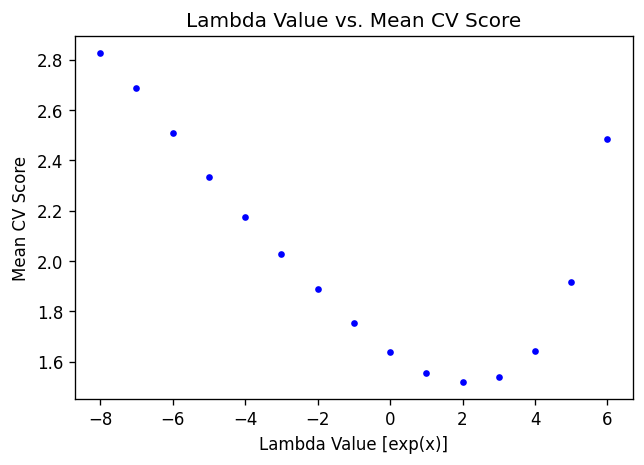

In [8]:
lambda_values = np.linspace(-8,6,15)
alphas = np.exp(lambda_values)
ridge_mean_cv_scores = [0]*15

for i, a in enumerate(alphas):
    ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge_regression', Ridge(alpha=a))])
    ridge_cv_scores = cross_val_score(ridge_pipeline, poly_train_set[0], y_train, cv=10, scoring='neg_mean_squared_error')
    ridge_mean_cv_scores[i] = -ridge_cv_scores.mean()
    
    #print()
    print(f"Lambda = {a}")
    #print(f"Ridge Regression CV Mean: {ridge_cv_scores.mean()}")
    #print(f"Ridge Regression CV: {ridge_cv_scores}")
    #print("================================================")
    
# Plot
fig, ax = plt.subplots(dpi = 120)
fig.set_facecolor('white')

# Plot Formatting 
ax.set_title('Lambda Value vs. Mean CV Score')
ax.set_xlabel('Lambda Value [exp(x)]')
ax.set_ylabel('Mean CV Score')

# Plot Data
ax.plot(lambda_values, ridge_mean_cv_scores, 'b.')

### Question 7: Test error  (2pt)
Now test how the ridge model, fitted to the whole training set, performs on the test data set. 


Report the following:

* The mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem. 
* The proportion of the variance explained by your model - along wth a 95% confidence interval.

In [9]:
# Train Model 
ridge_pipeline = Pipeline([('poly_features', PolynomialFeatures()), ('scaler', StandardScaler()), ('ridge_regression', Ridge(alpha=np.exp(2)))])
ridge_pipeline.fit(x_train, y_train)
yp_ridge = ridge_pipeline.predict(x_test)

#Compute the errors and a point estimate of the generalization error
test_errors = np.square(y_test - yp_ridge)
generalization_error = test_errors.mean()

#Construct a confidence interval
test_ci = generalization_error + 1.96 * np.std(test_errors) / np.sqrt(len(test_errors)) * np.array([-1, 1])


tss = np.mean((y_test - yp_ridge.mean())**2)
variance_mse = 1 - generalization_error/tss
variance_mse_ci = 1 - (test_ci[::-1] * np.array([1, 1]) /tss)

print(f'Generaliztion Error: {generalization_error}')
print(f'Confidence Interval of Error: {test_ci}')

print(f'Model Variance Explained By Mean: {variance_mse}')
print(f'Confidence Interval of  Model Variance: {variance_mse_ci}')

Generaliztion Error: 1.7057441746268132
Confidence Interval of Error: [1.38183746 2.02965089]
Model Variance Explained By Mean: 0.9669044385300758
Confidence Interval of  Model Variance: [0.96061987 0.97318901]


## Question 8: Analyzing Ridge Coefficients (3 pts)
In this question, you are first required to extract all the coefficients of the standing tackle, composure and marking features from the best model of question 7. After that, calculate the mean of the coefficients of the aforementioned features and analyze the results. Based on these observations, draw conclusions about the results in question 4. 

In [10]:
ridge_coefs = ridge_pipeline.named_steps['ridge_regression'].coef_.reshape(1,-1)

# Build Data Frame to extract Coef Columns by Name
p = PolynomialFeatures(degree=2).fit(x_test)
features = pd.DataFrame(ridge_coefs, columns=p.get_feature_names(x_data.columns))

standing_coefs = features.filter(regex="standing_tackle.*")
composure_coefs = features.filter(regex="composure.*")
marking_coefs = features.filter(regex="marking.*")

#print(standing_coefs)
#print(composure_coefs)
#print(marking_coefs)

print(f"Standing Coef Mean: {standing_coefs.to_numpy().mean()}")
print(f"Composure Coef Mean: {composure_coefs.to_numpy().mean()}")
print(f"Marking Coef Mean: {marking_coefs.to_numpy().mean()}")
print(f"Total Coef Mean: {ridge_coefs.mean()}")

Standing Coef Mean: 0.023687032105556925
Composure Coef Mean: 0.01796384017178658
Marking Coef Mean: 0.014336846518142534
Total Coef Mean: 0.020602919538115338


## Question 9: Lasso Regression (2pts)
Let us assume that you are building a linear regression model using only three features: standing tackle, marking, and composure to predict a player's overall rating. Based on the results of question 8, what do you think will be the features' coefficients while applying the lasso regression optimization? Answer in no more than 5 sentences. 

### Answer

Lasso Regression is useful at simplifying the model with many unnecessary variables that don't correlate to the output.
Lasso Regression is able to simplify models since it is able to reduce coefs to zero where as ridge regression can only achieve near zero coeff values.
Since the values of the ridge coefs are close to zero they will likely become zero with a lasso regression.
The largest coef was standing_tackle and would likely be the last coef to be zeroed with increases to the alpha of the ridge regression

In [ ]:

lambda_values = np.linspace(-8,6,15)
alphas = np.exp(lambda_values)
lasso_mean_cv_scores = [0]*15

for i, a in enumerate(alphas):
    lasso_pipeline = Pipeline([('scaler', StandardScaler()), ('lasso_regression', sk.linear_model.Lasso(alpha=a))])
    lasso_cv_scores = cross_val_score(lasso_pipeline, poly_train_set[0], y_train, cv=10, scoring='neg_mean_squared_error')
    lasso_mean_cv_scores[i] = -lasso_cv_scores.mean()
    
    #print()
    print(f"Lambda = {a}")
    #print(f"Ridge Regression CV Mean: {ridge_cv_scores.mean()}")
    #print(f"Ridge Regression CV: {ridge_cv_scores}")
    #print("================================================")
    
# Plot
fig, ax = plt.subplots(dpi = 120)
fig.set_facecolor('white')

# Plot Formatting 
ax.set_title('Lambda Value vs. Mean CV Score')
ax.set_xlabel('Lambda Value [exp(x)]')
ax.set_ylabel('Mean CV Score')

# Plot Data
ax.plot(lambda_values, lasso_mean_cv_scores, 'b.')



lasso_pipeline = Pipeline([('poly_features', PolynomialFeatures()), ('scaler', StandardScaler()), ('lasso', sk.linear_model.Lasso(alpha=np.exp(2)))])
lasso_pipeline.fit(x_train, y_train)
lasso_coefs = ridge_pipeline.named_steps['ridge_regression'].coef_.reshape(1,-1)

# Build Data Frame to extract Coef Columns by Name
p = PolynomialFeatures(degree=2).fit(x_test)
l_features = pd.DataFrame(lasso_coefs, columns=p.get_feature_names(x_data.columns))

l_standing_coefs = l_features.filter(regex="standing_tackle.*")
l_composure_coefs = l_features.filter(regex="composure.*")
l_marking_coefs = l_features.filter(regex="marking.*")

#print(standing_coefs)
#print(composure_coefs)
#print(marking_coefs)

print(f"Standing Coef Mean: {l_standing_coefs.to_numpy().mean()}")
print(f"Composure Coef Mean: {l_composure_coefs.to_numpy().mean()}")
print(f"Marking Coef Mean: {l_marking_coefs.to_numpy().mean()}")


c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 963.4707050937617, tolerance: 10.869915955555546
  positive)
c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933.3527319821098, tolerance: 10.953489288888887
  positive)
c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916.1672417638192, tolerance: 10.968230622222237
  positive)
c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_coordi

Lambda = 0.00033546262790251185
Lambda = 0.0009118819655545162
Lambda = 0.0024787521766663585
Lambda = 0.006737946999085467
Lambda = 0.01831563888873418


## Note: 
After completing all the tasks and before submitting: 
* Restart you kernel by clicking 'Restart & Run all'
* Fix any errors resulting from the first step.
* Repeat the first two steps until no errors are encountered. 